# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
cifar100.load_data(label_mode='fine')

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [57]:
class_names[30]

'dolphin'

In [4]:
# Your Code Here
#inspect the shape of the data set
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


There are 60000 images, each image is 32 x 32, and the 3 at the end is for Red, Green and Blue information.

In [5]:
#inspect the data types
print(x_train.dtype)
print(y_train.dtype)

uint8
int64


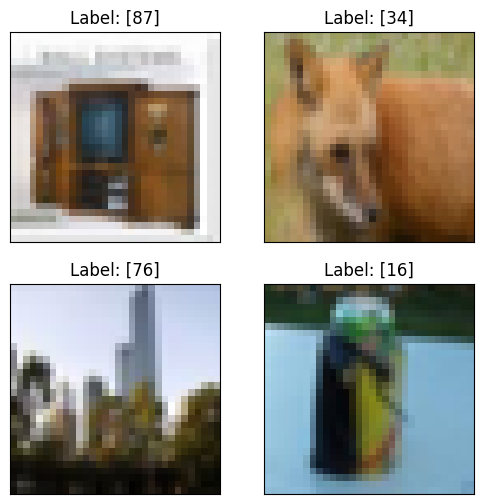

In [6]:
#using code from lab 1 to display a few of the images
import numpy as np
import matplotlib.pyplot as plt

# Selecting 4 random indices
random_indices = np.random.choice(len(x_train), 4, replace=False)

# Creating a 2x2 grid plot
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [7]:
# Preprocessing step 1 - Normalization

import numpy as np

# x_train and x_test are uint8 array
# Convert to float32 to allow for decimals and normalize
x_train_nor = x_train.astype('float32') / 255.0
x_test_nor = x_test.astype('float32') / 255.0

In [8]:
# Preprocessing step 2 - Labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

In [9]:
# Preprocessing step 3 - Split training data to 80% training and 20% validation
from sklearn.model_selection import train_test_split

# Assuming x_train and y_train are your training data and labels
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print(f'Training data shape: {x_train.shape}')
print(f'Validation data shape: {x_val.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation labels shape: {y_val.shape}')

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [10]:
from tensorflow.keras import layers, models

model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

# Second Convolutional Layer
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Flatten the data
model.add(layers.Flatten())

# First Dense Layer
model.add(layers.Dense(100, activation='relu'))

# Second Dense Layer
model.add(layers.Dense(50, activation='relu'))

# Output Layer for 100 classes
model.add(layers.Dense(100, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [15]:
# Model
#using categorical_crossentropy for the loss function as it is commonly used for classification problems
#using the RMSprop optimizer to try something new; it is used for classification problems as well
import tensorflow as tf

model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001), # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [16]:
# Your Code Here
model.fit(
    x_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_data=(x_val, y_val) # Use validation data set for validation
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2575 - loss: 3.0543 - val_accuracy: 0.2010 - val_loss: 3.4619
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2856 - loss: 2.8945 - val_accuracy: 0.2412 - val_loss: 3.3432
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3033 - loss: 2.8128 - val_accuracy: 0.2545 - val_loss: 3.2358
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3210 - loss: 2.7241 - val_accuracy: 0.2484 - val_loss: 3.4236
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3348 - loss: 2.6365 - val_accuracy: 0.1935 - val_loss: 3.8076


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.<br>
The initial loss of the model is 3.57 with accuracy of 20.65%


In [17]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1881 - loss: 3.8335
Loss:     3.78
Accuracy: 19.31%


- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> __20.92%____
- <b>Other metric:</b> __Precision____
- <b>Reason for selection:</b> __Easy to understand and implement___
- <b>Value of metric:</b> ___60%___
- <b>Interpretation of metric value:</b> ___A precision 0f 60% the model is correct 60% of the time when classifying an image.  This is not bad, but also not great.  Coupled with the low accuracy value, this indicates the model requires improvements in the area architecture, hyperparameter tuning, #of epochs, and/or maybe dropout.___

In [19]:
# Model
#using categorical_crossentropy for the loss function as it is commonly used for classification problems
#using the RMSprop optimizer to try something new; it is used for classification problems as well
import tensorflow as tf

model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001), # Optimizer
    metrics=['accuracy', tf.keras.metrics.Precision()] # Metrics to evaluate the model
)

In [20]:
loss, accuracy, precision = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1881 - loss: 3.8335 - precision_1: 0.4393
Loss:     3.78
Accuracy: 19.31%
Precision: 45.85%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.

In [22]:
%%time



# Plot the training and validation accuracy
history = model.fit(
              x_train, # Training data
              y_train, # Training labels
              epochs=5, # Number of epochs
              batch_size=32, # Number of samples per batch
              validation_data=(x_val, y_val) # Use validation data set for validation
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3369 - loss: 2.6625 - precision_1: 0.6824 - val_accuracy: 0.2570 - val_loss: 3.3991 - val_precision_1: 0.5365
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3491 - loss: 2.5550 - precision_1: 0.6995 - val_accuracy: 0.2395 - val_loss: 3.3977 - val_precision_1: 0.5403
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3681 - loss: 2.4863 - precision_1: 0.7072 - val_accuracy: 0.2022 - val_loss: 3.6138 - val_precision_1: 0.4978
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3796 - loss: 2.4402 - precision_1: 0.7043 - val_accuracy: 0.2439 - val_loss: 3.5127 - val_precision_1: 0.5242
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3833 - loss: 2.4156 - precision_1: 0.6954 - val_accuracy: 0.2608 - val_loss: 3.7897 - val_precision_1: 0.4683
CPU times: user 26.8 s, sys: 2.37 s, total: 29.1 s
Wall time: 30.2 s


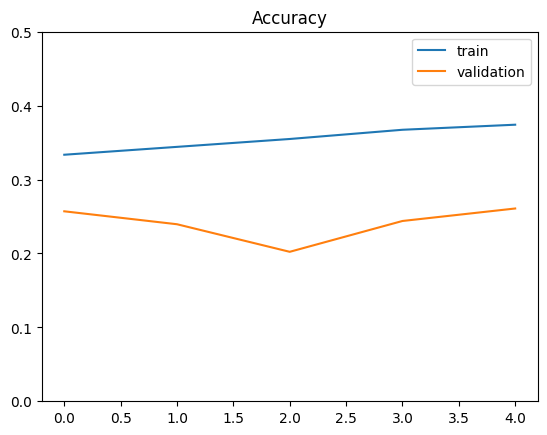

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.title('Accuracy');
plt.show()

In [27]:
print(history.history)

{'accuracy': [0.33352500200271606, 0.3441750109195709, 0.3548249900341034, 0.36730000376701355, 0.37415000796318054], 'loss': [2.6657183170318604, 2.6046385765075684, 2.5573132038116455, 2.5091488361358643, 2.4771785736083984], 'precision_1': [0.677376925945282, 0.6856512427330017, 0.6902827024459839, 0.6928409934043884, 0.6898597478866577], 'val_accuracy': [0.25699999928474426, 0.2395000010728836, 0.2021999955177307, 0.24390000104904175, 0.26080000400543213], 'val_loss': [3.3990566730499268, 3.397735834121704, 3.6138319969177246, 3.512699604034424, 3.7896761894226074], 'val_precision_1': [0.5365053415298462, 0.5403477549552917, 0.4977678656578064, 0.5242140889167786, 0.46829843521118164]}


- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?
Correct plot is of a mushroom [51] and the image looks like a mushroom.  The incorrect plot was a mountain but was classified as a dolphin [30].  I can from the image that it could be mis-classifed as a dolphin.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


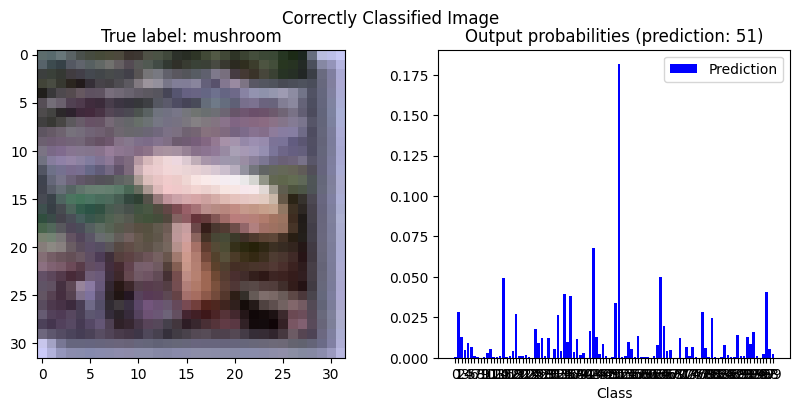

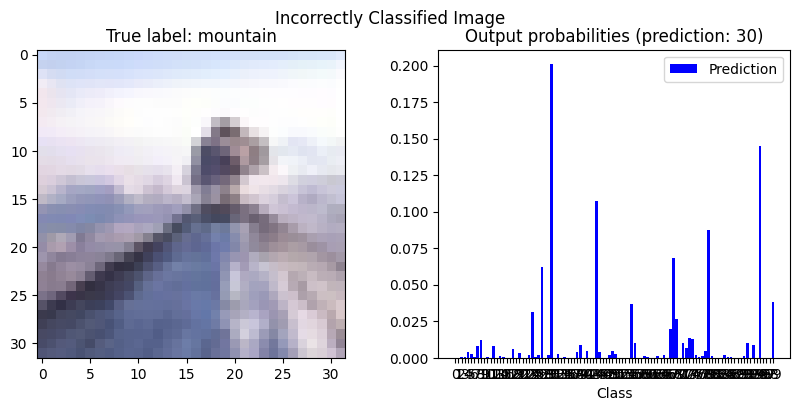

In [55]:
# Make predictions on the test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from one-hot encoded y_test
true_labels = np.argmax(y_test, axis=1)  # Extract true labels

# Identify correctly and incorrectly classified images
correct_indices = np.where(predicted_labels == true_labels)[0] #compare with true_label
incorrect_indices = np.where(predicted_labels != true_labels)[0] #compare with true_label

# Select one correctly classified image and one incorrectly classified image
correct_sample_idx = correct_indices[0]
incorrect_sample_idx = incorrect_indices[0]

def plot_image_with_probabilities(sample_idx, title):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Reshape to the original image dimensions (32, 32, 3)
    ax0.imshow(x_test[sample_idx].reshape(32, 32, 3), cmap=plt.cm.gray_r, interpolation='nearest')
    ax0.set_title(f"True label: {class_names[np.argmax(y_test[sample_idx])]}") # Get the class name

    # Plot probabilities for all 100 classes
    ax1.bar(range(100), predictions[sample_idx], color="blue")
    ax1.set_xticks(range(100))
    ax1.set_title(f'Output probabilities (prediction: {predicted_labels[sample_idx]})')
    ax1.set_xlabel('Class')
    ax1.legend(['Prediction'], loc='upper right')

    plt.suptitle(title)
    plt.show()

# Plot correctly classified image
plot_image_with_probabilities(correct_sample_idx, "Correctly Classified Image")

# Plot incorrectly classified image
plot_image_with_probabilities(incorrect_sample_idx, "Incorrectly Classified Image")

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.<br>
I chose dropout becuase it was easy to implement and there is indication of over fitting in the original model
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.<br> The initial values were chosen based on research I did on dropout what typical values are for convolutional and dense layers.  I did not have time to tune the hyperparameters as I'm new to this topic, but I know I could implement a grid or random search to explore different rates.

In [58]:
# Implemented dropout to the original model each of the convolutional layers and dense layers

model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))  # Add dropout after the first convolutional layer

# Second Convolutional Layer
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))  # Add dropout after the second convolutional layer

# Flatten the data
model.add(layers.Flatten())

# First Dense Layer
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout after the first dense layer

# Second Dense Layer
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout after the second dense layer

# Output Layer for 100 classes
model.add(layers.Dense(100, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
Adding the dropout totally broke the model, accuracy and precision are both 1%
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [59]:
# Model
#using categorical_crossentropy for the loss function as it is commonly used for classification problems
#using the RMSprop optimizer to try something new; it is used for classification problems as well
import tensorflow as tf

model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001), # Optimizer
    metrics=['accuracy', tf.keras.metrics.Precision()] # Metrics to evaluate the model
)

In [60]:
loss, accuracy, precision = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0132 - loss: 33.2347 - precision_2: 0.0136
Loss:     33.05
Accuracy: 1.22%
Precision: 1.24%


In [62]:
%%time

# Setup the history object
history = model.fit(
              x_train, # Training data
              y_train, # Training labels
              epochs=5, # Number of epochs
              batch_size=32, # Number of samples per batch
              validation_data=(x_val, y_val) # Use validation data set for validation
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0090 - loss: 6.0420 - precision_2: 0.0184 - val_accuracy: 0.0087 - val_loss: 4.6061 - val_precision_2: 0.0000e+00
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0089 - loss: 4.6071 - precision_2: 0.0000e+00 - val_accuracy: 0.0082 - val_loss: 4.6067 - val_precision_2: 0.0000e+00
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0107 - loss: 4.6057 - precision_2: 0.0000e+00 - val_accuracy: 0.0082 - val_loss: 4.6070 - val_precision_2: 0.0000e+00
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0110 - loss: 4.6084 - precision_2: 0.0000e+00 - val_accuracy: 0.0091 - val_loss: 4.6071 - val_precision_2: 0.0000e+00
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0096 - loss: 4.6054 - precision_2: 0.0000e+00 - val_accuracy: 0.0086 - val_loss: 4.6071 - val_precision_2: 0.0000e+00
CPU times: user 29.3 s, sys: 2.52 s, total: 31.8 s
Wall time: 38.4 s


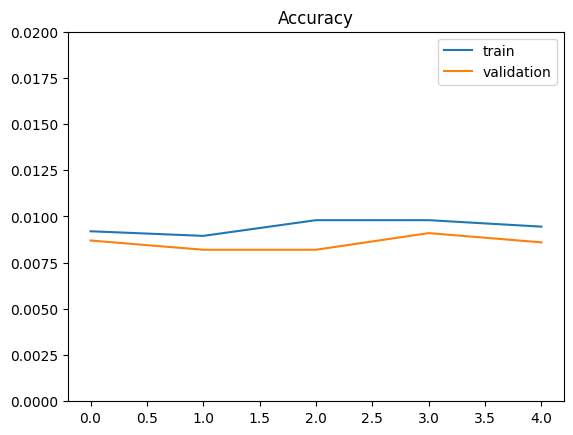

In [65]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylim(0, 0.02)
plt.legend(loc='best')
plt.title('Accuracy');
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


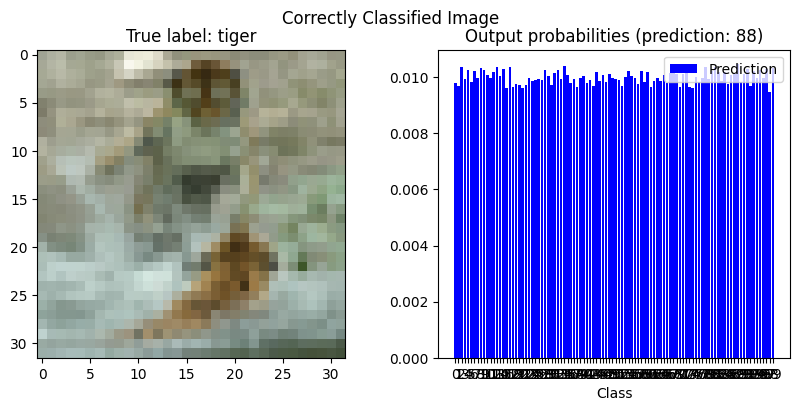

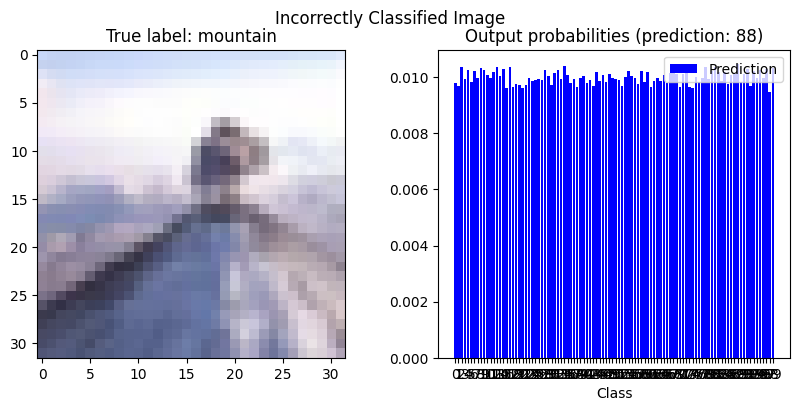

In [66]:
# Make predictions on the test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from one-hot encoded y_test
true_labels = np.argmax(y_test, axis=1)  # Extract true labels

# Identify correctly and incorrectly classified images
correct_indices = np.where(predicted_labels == true_labels)[0] #compare with true_label
incorrect_indices = np.where(predicted_labels != true_labels)[0] #compare with true_label

# Select one correctly classified image and one incorrectly classified image
correct_sample_idx = correct_indices[0]
incorrect_sample_idx = incorrect_indices[0]

def plot_image_with_probabilities(sample_idx, title):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Reshape to the original image dimensions (32, 32, 3)
    ax0.imshow(x_test[sample_idx].reshape(32, 32, 3), cmap=plt.cm.gray_r, interpolation='nearest')
    ax0.set_title(f"True label: {class_names[np.argmax(y_test[sample_idx])]}") # Get the class name

    # Plot probabilities for all 100 classes
    ax1.bar(range(100), predictions[sample_idx], color="blue")
    ax1.set_xticks(range(100))
    ax1.set_title(f'Output probabilities (prediction: {predicted_labels[sample_idx]})')
    ax1.set_xlabel('Class')
    ax1.legend(['Prediction'], loc='upper right')

    plt.suptitle(title)
    plt.show()

# Plot correctly classified image
plot_image_with_probabilities(correct_sample_idx, "Correctly Classified Image")

# Plot incorrectly classified image
plot_image_with_probabilities(incorrect_sample_idx, "Incorrectly Classified Image")

### Task 4c: Discussion of the results

- Briefly discuss the results.<br>
Adding dropout to the 4 layers ruined the model, it can no longer properly predict.
- Did the model's performance improve?<br>
The model is broken.
- Why do you think this is?<br>
I'm not quite sure, but probably should have started off with dropout on one layer.
- Do you think there is room for further improvement? Why or why not?<br>
100% - there are many things that can be done with enough time, different layers, epoch, neurons.
- What other techniques might you try in the future?<br>
Changing layers and # of epochs and neurons.
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.